# BIKE STORE EDA

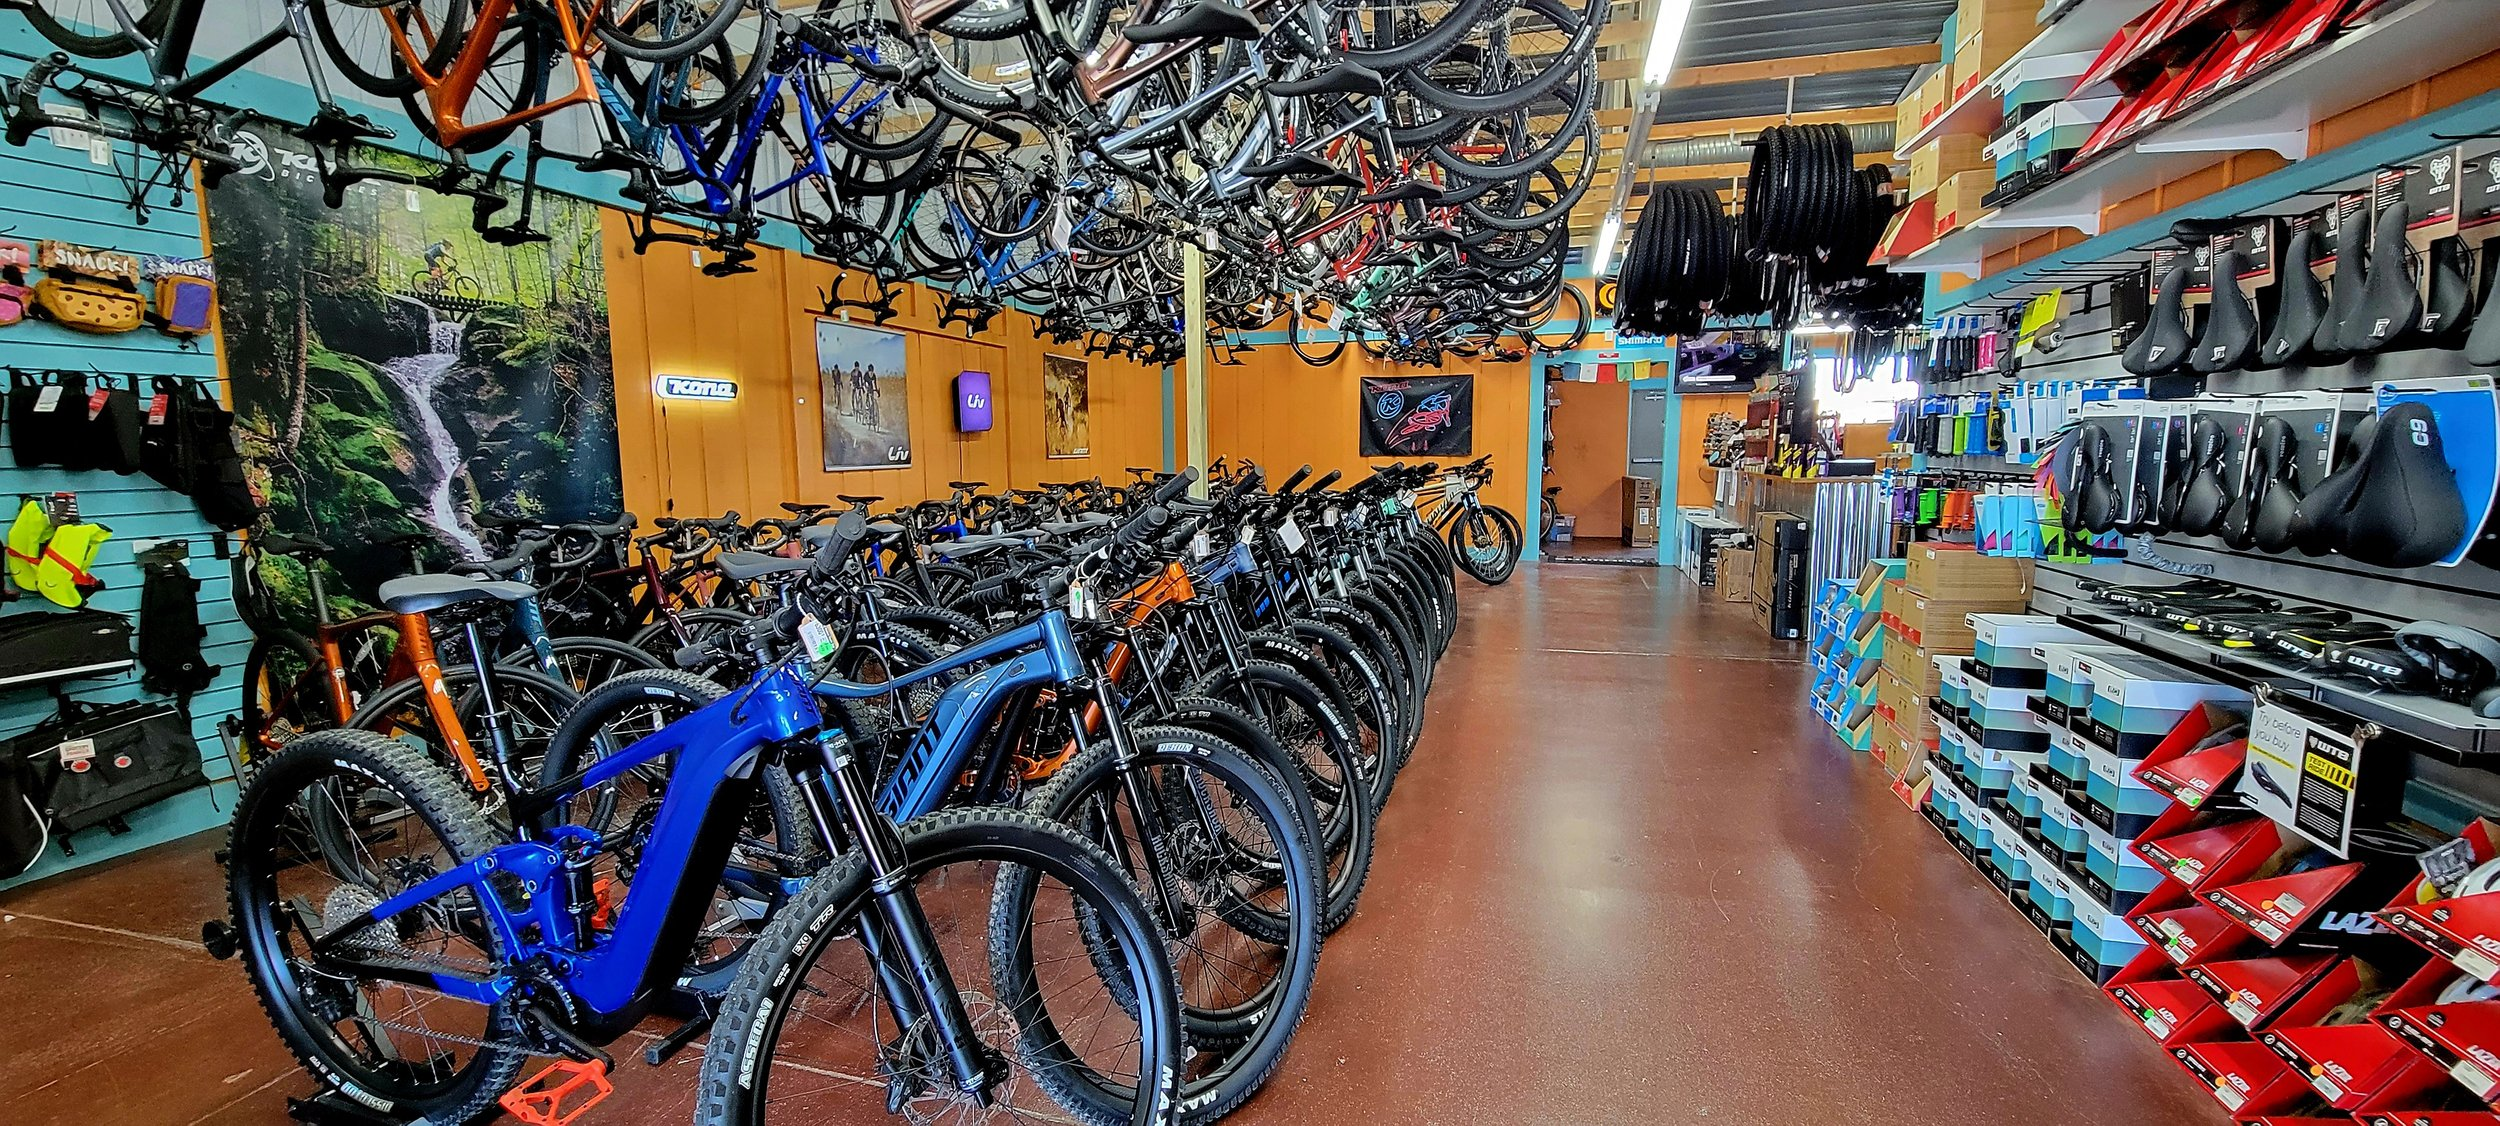

For this project we'll do an Exploratory Data Analysis on  a bike store sample data.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Importing the dataset and taking a look
df = pd.read_csv('Sales.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


## Inspecting the dataframe, any missing data, duplicates or null values?

In [3]:
#Null values
print("Sum of null values\n")
print(df.isna().sum())
print("\n")

#Info on dataset
print("Info on Dataset\n")
print(df.info())
print("\n")

#Duplicated values
print(f"Duplicated Elements: {df.duplicated().sum()}")

Sum of null values

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country      

Great! Our dataset looks great as we have no null values and all columns look to be in the correct datatype. Let's take a look at the duplicates and see if they'll have an effect on our dataset.

In [4]:
#Taking a look at the duplicates
df[df.duplicated()]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2014-02-18,18,February,2014,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111031,2016-02-18,18,February,2016,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


Ok so it's just duplicates of categories, countries and states which is ok. Let's now dive into the dataset and answer a few questions.

A brief statistical description of our dataset

In [5]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


Above is a statistical description of our dataset. From the revenue column we can see one item generated a revenue of $58,074 which is incredible. The Interquartile Range or where most values of each column range would be calculated by (75% - 25%)

Looking at the Profit's column, we see a min of (-30) which means a loss. Doing our analysis we'll have to split the profits column into profits, losses and no profits/loss for accurate analysis.

There's also (std) Standard Deviation, which shows us how far values are spread out in different columns in the dataset.

## Exploring Correlations

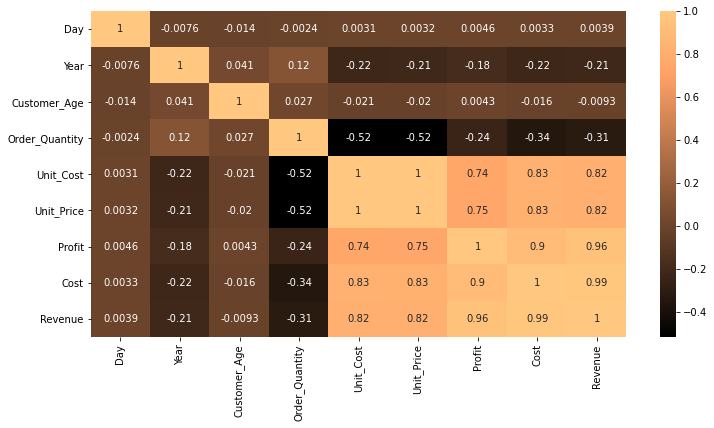

In [6]:
#Preparing the correlation matrix 
corr_data = df.corr()

#Creating the plot
plt.figure(figsize=(12,6))
sns.heatmap(corr_data,annot=True,cmap='copper');

From the above heatmap:

- `Cost` has the highest correlation with `Revenue`. This means an increase in cost of production of a product would also mean an increase in revenue. This doesn't necessarily mean causation.


- `Profit`, `Unit Price` and `Unit Cost` also have a high correlation with revenue.

## Let's take a look at countries, what country performed the best?

In [7]:
#Splitting our dataframe into profits only
profits = df[df['Profit']>0]
losses = df[df['Profit']<0]

#Let's group our data by the relevant metrics(Profit,Cost of production and Revenue)
countries = profits.groupby(['Country'],as_index=False)[['Revenue','Profit','Cost']].sum()

#Having a look
countries.style.background_gradient(cmap='Reds')

,Country,Revenue,Profit,Cost
0,Australia,21301569,6776030,14525539
1,Canada,7935738,3717296,4218442
2,France,8401019,2880692,5520327
3,Germany,8978512,3359995,5618517
4,United Kingdom,10646196,4413853,6232343
5,United States,27946329,11073644,16872685


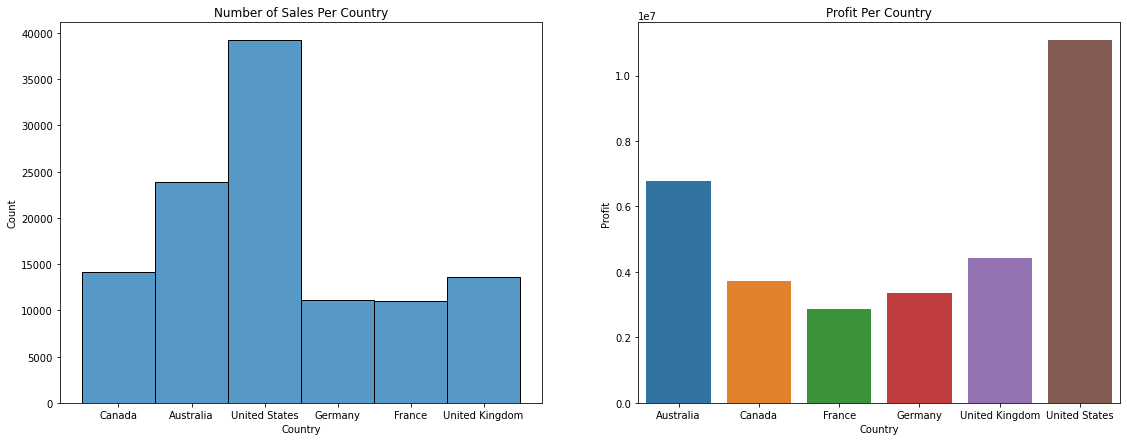

In [8]:
#Let's explore this using visualizations

#Creating the plot
#sns.set_style('dark')
#sns.set_context('notebook',font_scale=1.1)
plt.figure(figsize=(19,7))

#Setting the axes
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

#Plotting
sns.histplot(x='Country',data=df,ax=ax1)
sns.barplot(x='Country',y='Profit',data=countries, ax=ax2)
ax1.set_title('Number of Sales Per Country')
ax2.set_title('Profit Per Country');

- The first plot above shows us the number of sales for every country or the number of purchases made by each country. It's quite evident that `United States` leads this.

- The second plot shows us the total profit generated per country and it is not surprising that `United States` leads this, as they also have the highest number of purchases. `Germany` has done a bit better than `France` comparing to the number of sales in the first plot.

Let's now explore Revenue and Cost of production

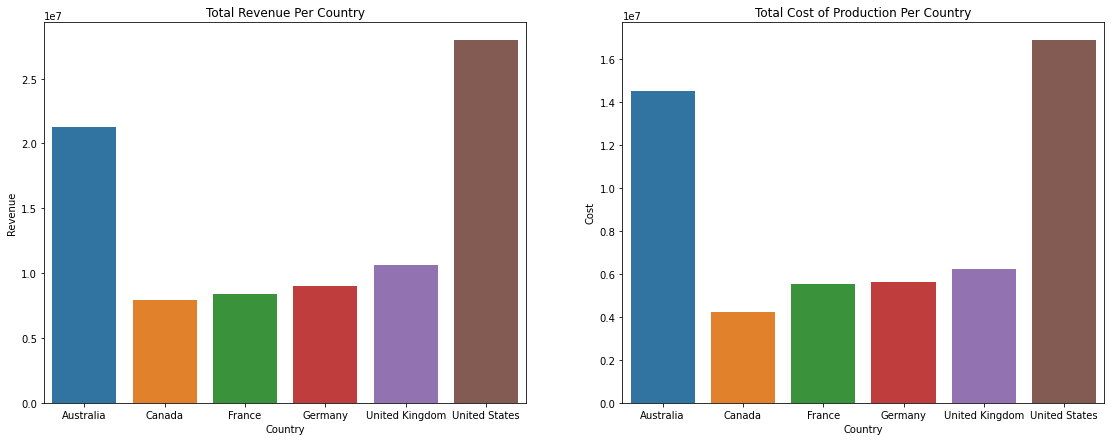

In [9]:
#Creating the plot
plt.figure(figsize=(19,7))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
sns.barplot(x='Country', y='Revenue',data=countries,ax=ax1)
sns.barplot(x='Country',y='Cost',data=countries,ax=ax2)

#Setting titles
ax1.set_title('Total Revenue Per Country')
ax2.set_title('Total Cost of Production Per Country');

Great! So our revenue in all countries is higher than the cost of production which means profits are being made.

- `United States` dominates Revenue followed by `Australia`.


- `United States` has the **highest** cost of production which is alright as they have dominated all along.

### Since states match with countries, let's have a look at them. We'll focus on the best performing country, see what state is doing the best

In [10]:
united_states = profits[profits['Country']=='United States']
us_states = united_states.groupby(['State'])[['Revenue','Profit','Cost']].sum().sort_values(by='Revenue',ascending=False)
us_states.style.background_gradient(cmap='Reds')

,Revenue,Profit,Cost
State,,,
California,17672620,7772869,9899751
Washington,6712453,1997550,4714903
Oregon,3450410,1258168,2192242
Wyoming,21812,5565,16247
Illinois,20141,8606,11535
Florida,11014,4700,6314
Ohio,9747,5407,4340
Arizona,9379,4279,5100
Texas,6835,2522,4313


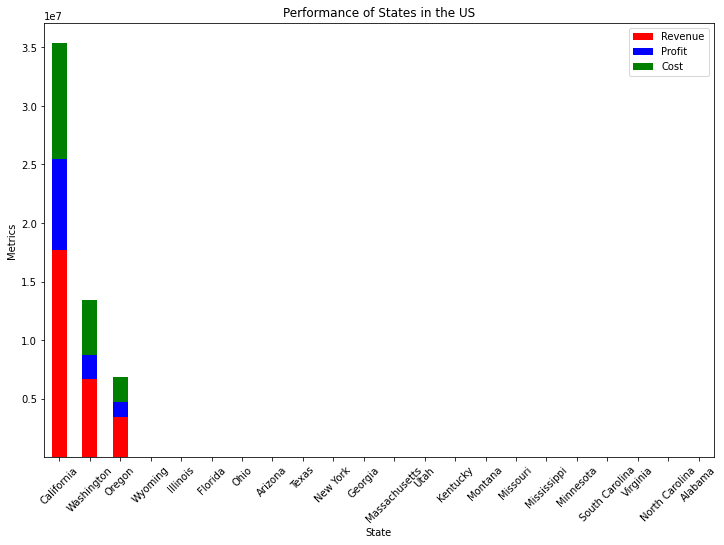

In [11]:
#Creating the plot
plt.figure(figsize=(12,8))
us_states.plot(kind='bar',stacked=True,color=['red','blue','green'],ax=plt.gca())

#Setting the title, label and xticks
plt.title('Performance of States in the US')
plt.ylabel('Metrics')
plt.xticks(rotation=45);

**`California`, `Washington` and `Oregon` have thrashed the game having the highest profits and revenues with California being the best.**

# Takeaways from our analysis

- **`United States` is the best country as it has dominated all aspects.**


- **`Canada` generates more profit than `France` even though they generate a lesser revenue.**


- **`France` has been the overall poor performing country.**


- **`California` is the best performing state in terms of revenue and profit.**

# Product Categories

Let's explore the distribution of various Products

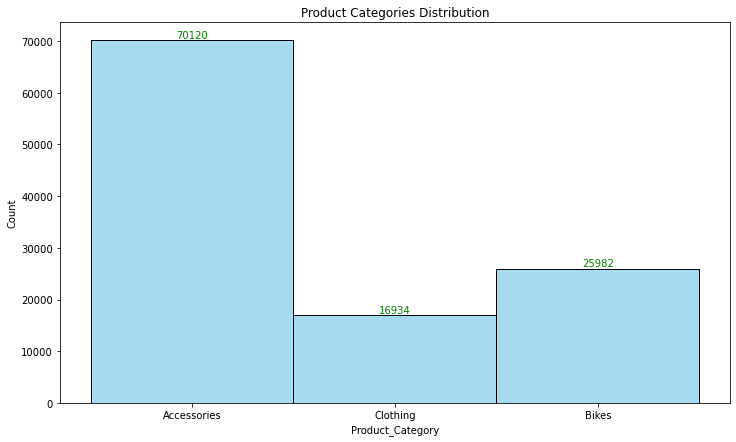

In [12]:
#Creating the plot
plt.figure(figsize=(12,7))
sns.histplot(x='Product_Category',data=df,color='#87CEEB')

#storing figure in an axis
ax = plt.gca()

#adding text
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(),int(p.get_height()),color='green',ha='center',va='bottom')

#Setting the title
plt.title('Product Categories Distribution');

From our above plot, we see that Accessories are the most in demand as they have the most purchases

Ok so accessories are the most in demand, do they also generate the highest revenue and profit? Is their cost of production high as well? Let's take a look.

In [13]:
#Grouping our dataset by the relevant metrics
products = profits.groupby(['Product_Category'])[['Revenue','Profit','Cost']].sum()

#Taking a look
products.style.background_gradient(cmap='Blues')

,Revenue,Profit,Cost
Product_Category,,,
Accessories,15117992,8862377,6255615
Bikes,61782134,20519276,41262858
Clothing,8309237,2839857,5469380


Let's visualize this..

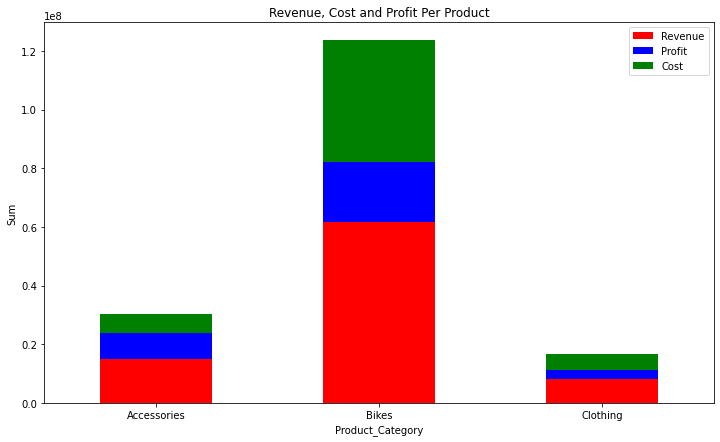

In [14]:
#Creating the plot
plt.figure(figsize=(12,7))
products.plot(kind='bar',stacked=True,color=['red','blue','green'],ax=plt.gca())

#Setting title, label and xticks
plt.title('Revenue, Cost and Profit Per Product')
plt.ylabel('Sum')
plt.xticks(rotation=0);

Ok so bikes generate the most revenue and profit and also cost more to produce. This is probably because of their prices as they are relatively more expensive than accessories. Accessories are relatively cheap hence bought in surplus.

Accessories are also doing very well as they generate more profit than their cost of production. In terms of efficiency, they are comparatively the best. 

Clothing is not doing so well as they as they are the lowest in demand. Nevertheless they are still relevant as they are making profit.

## Let's now see what product category is bringing the company losses.

In [15]:
#Grouping by relevant metrics
p_losses = losses.groupby(['Product_Category'])[['Revenue','Profit','Cost']].sum()
p_losses

,Revenue,Profit,Cost
Product_Category,,,
Clothing,17580,-410,17990


So it's only clothing.

Let's see these clothing products 

In [16]:
losses['Sub_Category'].value_counts()

Caps       42
Jerseys    16
Name: Sub_Category, dtype: int64

Caps and Jerseys are the only products that bring in losses.

Now, do we need to scrap off these products or do their profits overshadow their losses. Let's have a look below

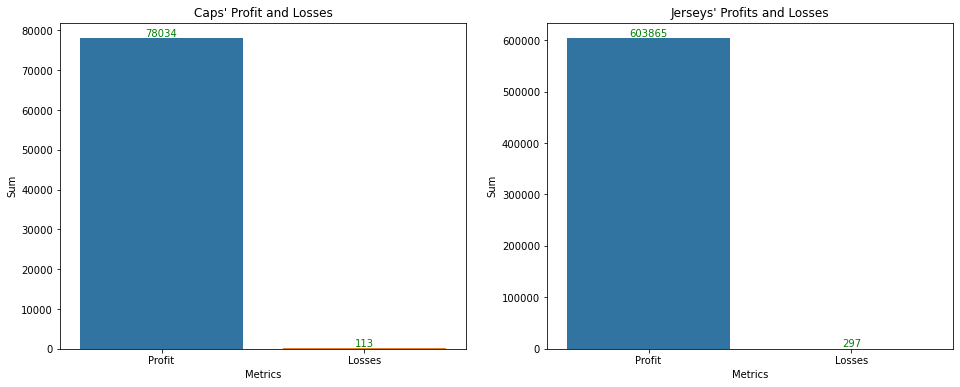

In [17]:
#Grouping for caps both profits and losses
caps_profit = profits[profits['Sub_Category']=='Caps']['Profit'].sum()
caps_losses = abs(losses[losses['Sub_Category']=='Caps']['Profit'].sum())
cap_values = [caps_profit, caps_losses]
cap_keys = ['Profit', 'Losses']

#Grouping for jerseys both profits and losses
jerseys_profit = profits[profits['Sub_Category']=='Jerseys']['Profit'].sum()
jerseys_losses = abs(losses[losses['Sub_Category']=='Jerseys']['Profit'].sum())
jersey_values = [jerseys_profit, jerseys_losses]
jersey_keys = ['Profit', 'Losses']

#Creating the plot
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
sns.barplot(x=cap_keys, y=cap_values,ax=ax1)
sns.barplot(x=jersey_keys, y=jersey_values,ax=ax2)

#Setting axis 1 title and labels
ax1.set_title("Caps' Profit and Losses")
ax1.set_ylabel('Sum')
ax1.set_xlabel('Metrics')

#Setting axis 2 title and labels
ax2.set_title("Jerseys' Profits and Losses")
ax2.set_ylabel('Sum')
ax2.set_xlabel('Metrics')

#Adding values
for a in ax1.patches:
    ax1.text(a.get_x() + a.get_width()/2, a.get_height(), int(a.get_height()),ha='center',va='bottom',color='green')
for b in ax2.patches:
    ax2.text(b.get_x() + b.get_width()/2, b.get_height(), int(b.get_height()), ha='center', va='bottom',color='green')

So their losses are completely insignificant, the company can still hold on to them as they are bringing in a lot of profits.

### Let's explore a feature(Age Group) and how it affects products

In [18]:
#Grouping the data
adults = df[df['Age_Group']=='Adults (35-64)']
youngsters = df[df['Age_Group']=='Young Adults (25-34)']
youth = df[df['Age_Group']=='Youth (<25)']
seniors = df[df['Age_Group']=='Seniors (64+)']

Let's now take a look..

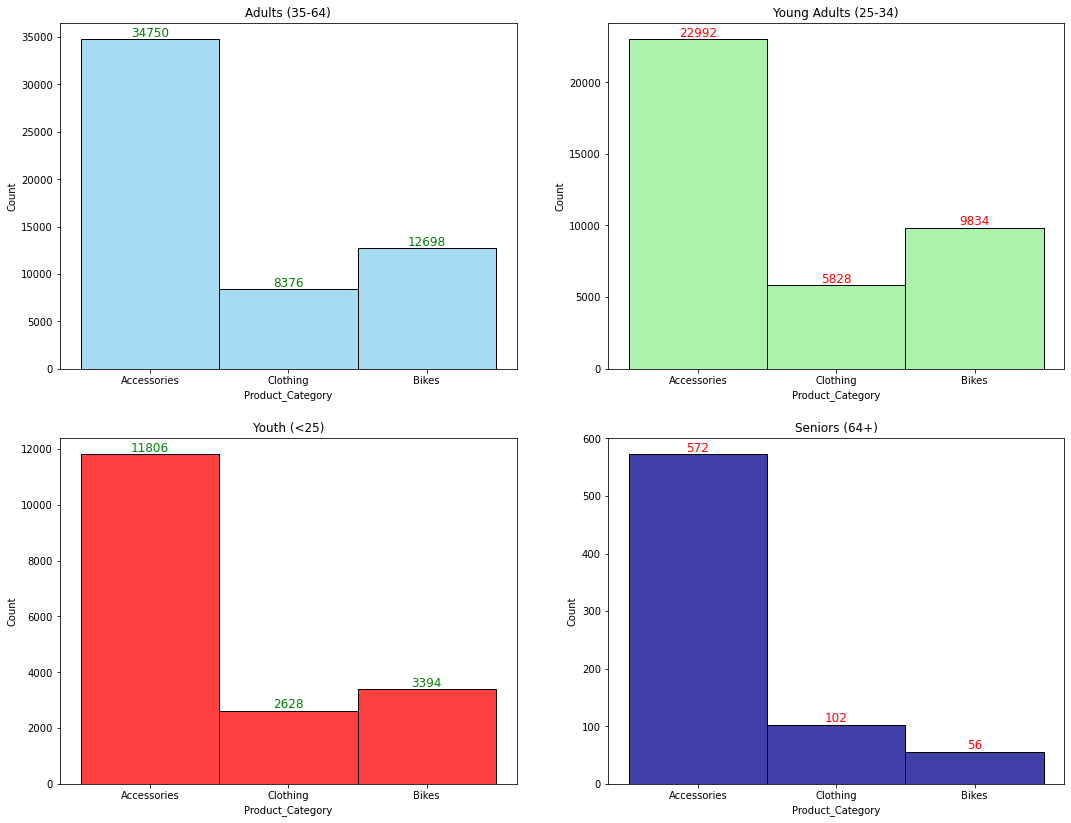

In [19]:
#Creating the plot
plt.figure(figsize=(18,14))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
sns.histplot(x='Product_Category',data=adults,color='skyblue',ax=ax1)
sns.histplot(x='Product_Category',data=youngsters,color='lightgreen',ax=ax2)
sns.histplot(x='Product_Category',data=youth,color='red',ax=ax3)
sns.histplot(x='Product_Category',data=seniors,color='darkblue',ax=ax4);

#Setting the titles
ax1.set_title('Adults (35-64)')
ax2.set_title('Young Adults (25-34)')
ax3.set_title('Youth (<25)')
ax4.set_title('Seniors (64+)')

#Setting values on the plot
for d in ax1.patches:
    ax1.text(d.get_x() + d.get_width()/2, d.get_height(),int(d.get_height()),ha='center',va='bottom',color='green',fontsize=12)
for e in ax2.patches:
    ax2.text(e.get_x() + e.get_width()/2, e.get_height(),int(e.get_height()),ha='center',va='bottom',color='red',fontsize=12)
for f in ax3.patches:
    ax3.text(f.get_x() + f.get_width()/2, f.get_height(),int(f.get_height()),ha='center',va='bottom',color='green',fontsize=12)
for g in ax4.patches:
    ax4.text(g.get_x() + g.get_width()/2, g.get_height(),int(g.get_height()),ha='center',va='bottom',color='red',fontsize=12)

From our plots above, adults, particularly those aged 35 and above make the most purchases. From this, we can say adults also generate the most revenue and profit making them the companies major market.

Seniors rank the lowest as expected. The seniors prefer more clothing than bikes.

# Takeaways from our product category analysis

- **`Accessories` are the most purchased items.**


- **`Bikes` generate the most revenue and profit.**


- **`Adults` particularly aged 35 and above is are the companies major customers.**


- **`Clothings` are the least sought after items. They are also the only category that bring in losses although their profits overshadow.**


# Sub Category Analysis

We've already had an introduction to to sub categories in the analysis above, and we've know what sub categories bring losses. We have also seen that these losses are insignificant.

First, let's see the distribution of these products rooting them to their product category.

In [20]:
#Rooting to product category while checking their counts
cat = df[['Product_Category','Sub_Category']].value_counts()

#Converting to dataframe
product_with_sub = pd.DataFrame(cat)

#Taking a look
product_with_sub

0
Product_Category Sub_Category            
Accessories      Tires and Tubes    33870
                 Bottles and Cages  15876
Bikes            Road Bikes         13430
Accessories      Helmets            12158
Bikes            Mountain Bikes      8854
Clothing         Jerseys             6010
                 Caps                4358
Accessories      Fenders             4032
Bikes            Touring Bikes       3698
Clothing         Gloves              2686
Accessories      Cleaners            1802
Clothing         Shorts              1794
Accessories      Hydration Packs     1334
Clothing         Socks               1122
                 Vests                964
Accessories      Bike Racks           592
                 Bike Stands          456

So Tires and Tubes have the most purchases.

Let's visualize this...

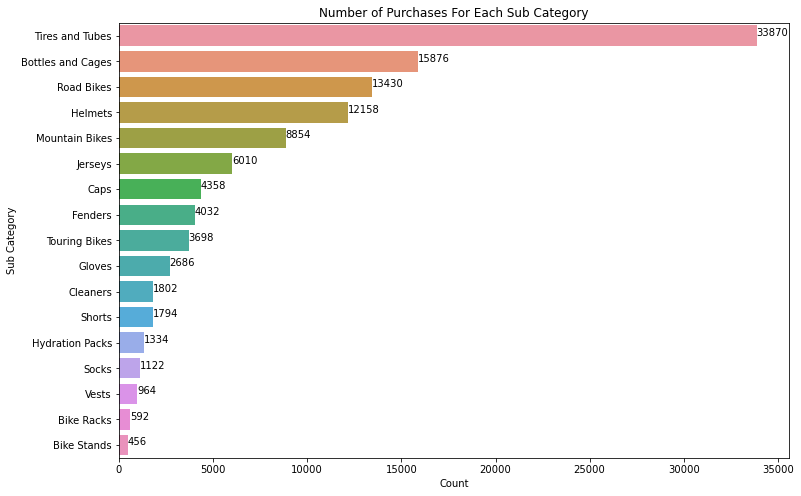

In [21]:
#Creating plotting data
subs = dict(df['Sub_Category'].value_counts())
subs_keys = list(subs.keys())
subs_values = list(subs.values())

#Creating the plot
plt.figure(figsize=(12,8))
sns.barplot(y=subs_keys,x=subs_values)

#Display values
for index, value in enumerate(subs_values):
    plt.text(value, index, str(value))

#Setting the title
plt.title('Number of Purchases For Each Sub Category')
plt.xlabel('Count')
plt.ylabel('Sub Category');

Now let's group them and analyze their profits, revenues and cost of production.

In [22]:
#Grouping by the relevant metrics
sub_categories = profits.groupby(['Sub_Category'])[['Revenue','Profit','Cost']].sum().sort_values(by='Revenue',ascending=False)

#Having a look
sub_categories.style.background_gradient(cmap='winter')

,Revenue,Profit,Cost
Sub_Category,,,
Road Bikes,33363061,10078875,23284186
Mountain Bikes,21123526,8160463,12963063
Touring Bikes,7295547,2279938,5015609
Helmets,5741081,3380203,2360878
Tires and Tubes,4670902,2727713,1943189
Jerseys,4082301,603865,3478436
Shorts,1740710,1034342,706368
Bottles and Cages,1409174,810598,598576
Fenders,1245733,748914,496819


Road Bikes generate the most revenue and profit

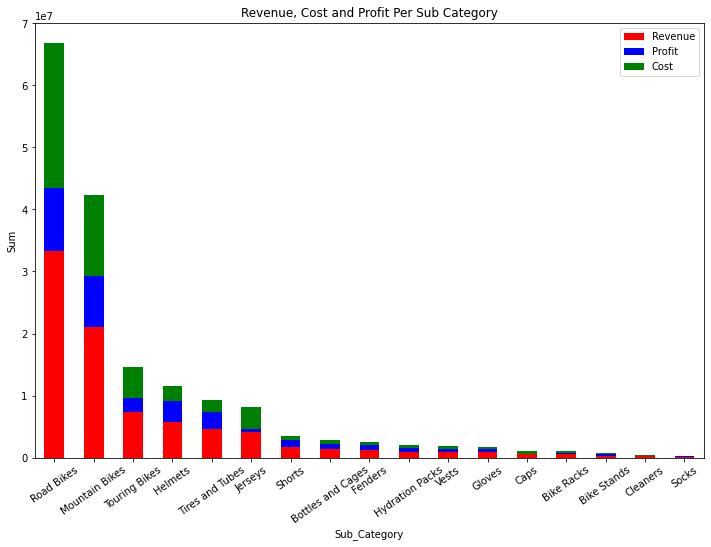

In [23]:
#Creating the plot
plt.figure(figsize=(12,8))
sub_categories.plot(kind='bar',stacked=True,color=['red','blue','green'],ax=plt.gca())

#Setting the xticks, title and label
plt.xticks(rotation=35)
plt.title('Revenue, Cost and Profit Per Sub Category')
plt.ylabel('Sum');

Let's take a look at efficiency, what products generate more profit than their cost of production?

In [24]:
#Creating the new dataframe
efficients = sub_categories[sub_categories['Profit']>sub_categories['Cost']]

#Taking a look
efficients.style.background_gradient(cmap='winter')

,Revenue,Profit,Cost
Sub_Category,,,
Helmets,5741081,3380203,2360878
Tires and Tubes,4670902,2727713,1943189
Shorts,1740710,1034342,706368
Bottles and Cages,1409174,810598,598576
Fenders,1245733,748914,496819
Hydration Packs,990406,572668,417738
Vests,949063,518791,430272
Gloves,871419,511654,359765
Bike Racks,517800,304455,213345


Let's visualize this..

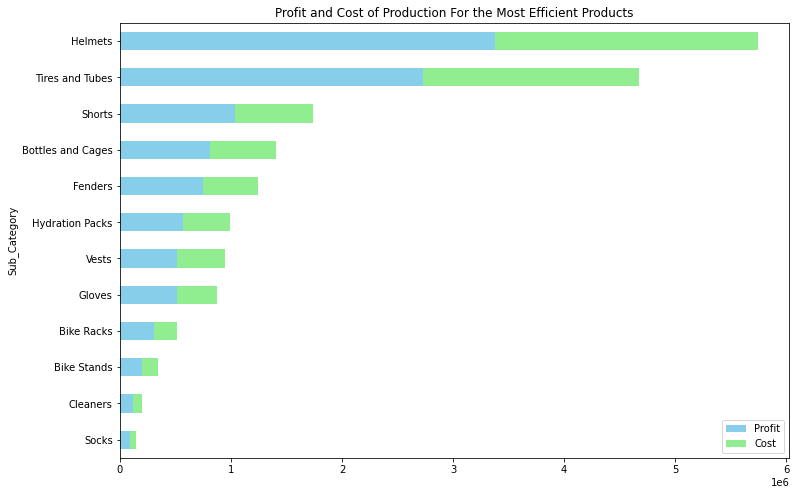

In [25]:
#Generating plotting data
to_plot = efficients[['Profit','Cost']].sort_values(by='Profit')

#Creating the plot
plt.figure(figsize=(12,8))
to_plot.plot(kind='barh',stacked=True,color=['skyblue','lightgreen'],ax=plt.gca())

#Setting the title
plt.title('Profit and Cost of Production For the Most Efficient Products');

- So helmets are the most efficient products in the store generating more profit than their cost of production.


- Tires and Tubes are also highly efficient having the highest number of purchases and generate more profit than cost of production.

# Takeaways from our sub category analysis

- **`Tires and Tubes` have the most purchases.**


- **`Road Bikes` generate the most revenue and profit**


- **`Helmets` are the most efficient products generating more profit than their cost of production.**

# Recommendations

- **Retain all products as they all generate profits for the business with no or insignificant losses.**


- **Increase the number of `Helmets`,`Tires and Tubes`,`Shorts`,`Bottles and Cages`,`Fenders`,`Hydration Packs`,`Vests`,`Gloves`,`Bike Racks`,`Bike Stands`,`Cleaners` and `Socks` as they generate more profit than their cost of production making the business perform better.**

## Let's now have a quick look at the age distribution of customers

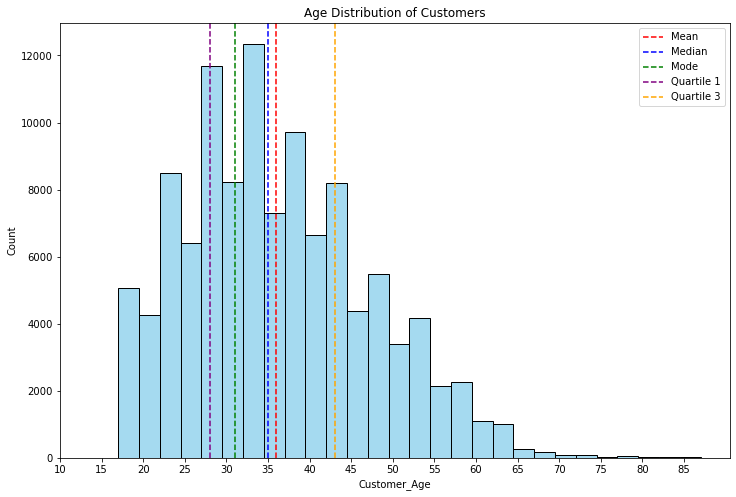

In [26]:
#Creating the plot
plt.figure(figsize=(12,8))
bins = 28
sns.histplot(x='Customer_Age',data=df,bins=bins,color='skyblue')

#calculating various statistical measures
customer_mean = df['Customer_Age'].mean()
customer_median = df['Customer_Age'].median()
customer_mode = int(df['Customer_Age'].mode())
customer_q1 = int(np.percentile(df['Customer_Age'], 25))
customer_q3 = int(np.percentile(df['Customer_Age'], 75))

#Displaying the results
plt.axvline(x=customer_mean,ls='--',color='red',label='Mean')
plt.axvline(x=customer_median,ls='--',color='blue',label='Median')
plt.axvline(x=customer_mode,ls='--',color='green',label='Mode')
plt.axvline(x=customer_q1,ls='--',color='purple',label='Quartile 1')
plt.axvline(x=customer_q3,ls='--',color='orange',label='Quartile 3')

#Setting xticks and title
xticks = np.arange(10,90,5)
plt.xticks(xticks)
plt.title('Age Distribution of Customers')

#Pushing labels
plt.legend();

From our above plot we can see the age distribution of customers.

We can also see the mean, median, mode, first quartile and third quartile.

We can calculate our age range or Interquartile range(IQR) by (Quartile3 - Quartile1)

IQR = 43 - 28 = 15. 

Most of the company's customers are from age 28 to 43.

## Now let's analyze the revenue trend of our company, how has the company been fairing over the years?

In [27]:
#Converting the 'Date' column to pandas 'Date-time' format
df['Date'] = pd.to_datetime(df['Date'])

#Create a new column 'Month-Year' that will store the month and year the revenue was made
df['Month_Year'] = df['Date'].dt.to_period('M')

#Extracting year and month name for our column
df['Month_Year'] = df['Month_Year'].dt.strftime("%Y : %B")

#Creating a new column 'month code' to store our months
df['Month_Code'] = df['Date'].dt.month

#Sorting our dataset to start from the first date
df = df.sort_values(by=['Year','Month_Code','Day'])

#Taking a look
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Month_Year,Month_Code
49787,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813,2011 : January,1
58729,2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439,2011 : January,1
58913,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419,2011 : January,1
60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529,2011 : January,1
63711,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621,2011 : January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104927,2016-07-31,31,July,2016,43,Adults (35-64),M,Australia,Victoria,Accessories,Tires and Tubes,HL Mountain Tire,13,13,35,190,169,359,2016 : July,7
105274,2016-07-31,31,July,2016,34,Young Adults (25-34),M,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,16,2,5,38,32,70,2016 : July,7
105275,2016-07-31,31,July,2016,34,Young Adults (25-34),M,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,8,2,5,19,16,35,2016 : July,7
112217,2016-07-31,31,July,2016,54,Adults (35-64),M,Canada,British Columbia,Clothing,Vests,"Classic Vest, S",11,24,64,433,264,697,2016 : July,7


Great! Now our dataset is sorted out from the first date, let's do some grouping

In [28]:
#Grouping by the sum of revenue
time_wise = df.groupby(['Month_Year','Month_Code','Year'],as_index=False)['Revenue'].sum().sort_values(by=['Year','Month_Code'])

#Having a look
time_wise

,Month_Year,Month_Code,Year,Revenue
4,2011 : January,1,2011,675193
3,2011 : February,2,2011,637598
7,2011 : March,3,2011,708517
0,2011 : April,4,2011,698782
8,2011 : May,5,2011,734537
...,...,...,...,...
60,2016 : March,3,2016,2608663
55,2016 : April,4,2016,2756864
61,2016 : May,5,2016,3264343
59,2016 : June,6,2016,3586300


Let's visualize this using a lineplot

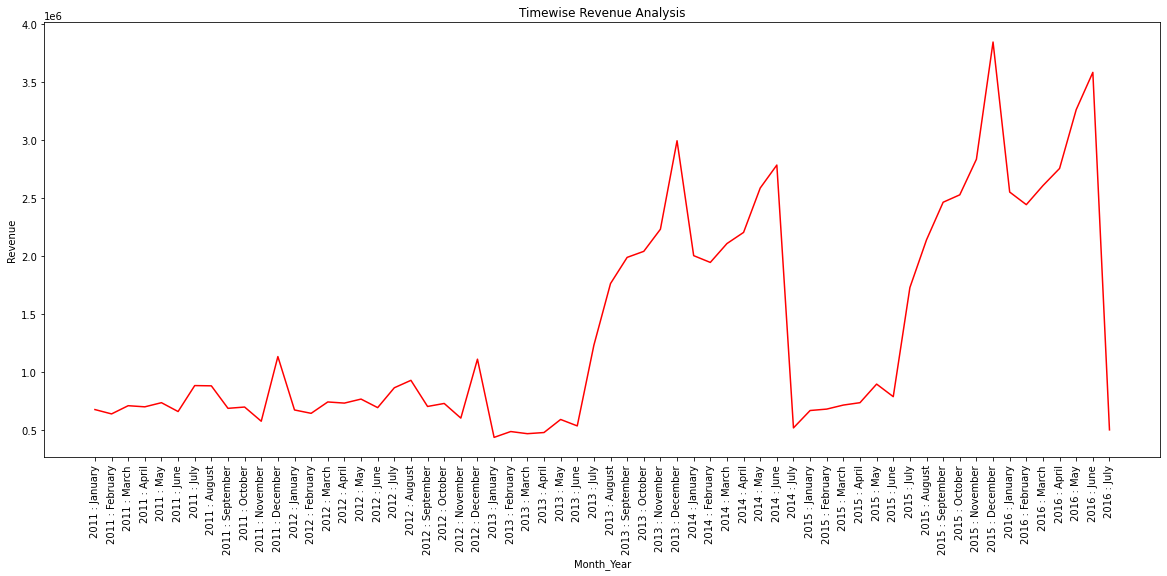

In [29]:
#Creating the plot
plt.figure(figsize=(20,8))
sns.lineplot(x='Month_Year',y='Revenue',data=time_wise,color='red')

#Setting xticks and title
plt.xticks(rotation=90)
plt.title('Timewise Revenue Analysis');

So from our line plot above, we see the company was on an upward path since 2011.

The company has had 4 peaks:
- 2013 October

- 2014 May

- 2015 December

- 2016 May

With the highest being in 2015 December.

The Company's Lowest was in 2013 January although they were able to come back up

# Overall Conclusions

- **The Company is making a lot of profits and revenue in the `United States` followed by `Australia` then `United Kingdom`.**


- **`California` is the state with the highest generated revenue.**


- **`Accessories` sell the most but it is the bikes that generate the most revenue and profit.**


- **Adults particularly aged between `28 and 43` are the company's major customers.**


- **`Helmets` are the most efficient products in the store generating the most profit out of their cost of production.**


- **`Tubes and Tires` sell the most**

# Recommendations

- **The Company should retain all their products as they are making profits on all of them.**


- **The Company should increase the number of `Helmets`,`Tires and Tubes`,`Shorts`,`Bottles and Cages`,`Fenders`,`Hydration Packs`,`Vests`,`Gloves`,`Bike Racks`,`Bike Stands`,`Cleaners` and `Socks` as they generate more profit out of  their cost of production making the business perform better.**

# What I'd like to do if I had more time

- **Find out clothes with the best and worst performance and advice the company to avoid the worst performing clothes since they rarely sell.**


- **Find out what led to the company's decline in 2013 January, look at products, how they shifted and what led to its upward boost from July to December in the same year.**

# Thanks Note

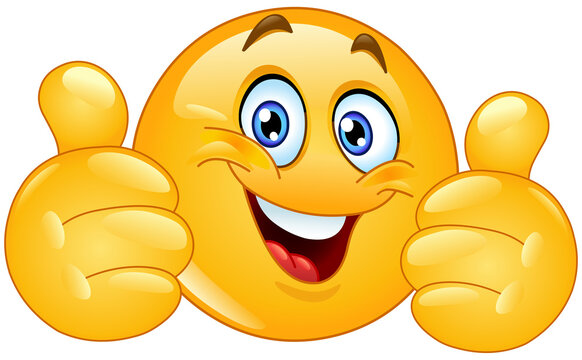

**Thankyou for your sparing your time and following my analysis. Be Blessed.**